## what I will do now 

In [1]:
Agenda = {
    1:"data preparation and load",
    2:"build a model",
    3:"fitting the model to data which we called it (training model)",
    4:"prediction and evaluate the model",
    5:"save and load model",
    6:"putting it all together"
}

Agenda

{1: 'data preparation and load',
 2: 'build a model',
 3: 'fitting the model to data which we called it (training model)',
 4: 'prediction and evaluate the model',
 5: 'save and load model',
 6: 'putting it all together'}

## import what we want

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# check torch version
print(torch.__version__)

1.11.0+cpu


## 1.Data preparation and load

In [3]:
# data
start = 1
end = 10
step = 0.1

x = torch.arange(start , end , step).unsqueeze(dim = 1) # to add extra dimention

# to write the y in data which look like target we first 
# create known parameter to implement the Linear R model

weight = 0.7
bias = 0.3 

y = weight * x + bias

x[:5] , y[:5]

(tensor([[1.0000],
         [1.1000],
         [1.2000],
         [1.3000],
         [1.4000]]),
 tensor([[1.0000],
         [1.0700],
         [1.1400],
         [1.2100],
         [1.2800]]))

In [4]:
len(x) , len(y)

(90, 90)

In [5]:
# split data into train and test data

train_split = int(0.8*len(x)) # 80% of all x data for train 
x_train , y_train = x[:train_split] , y[:train_split]
x_test , y_test = x[train_split:] , y[train_split:]

len(x_train) , len(y_train) , len(x_test) , len(y_test)

(72, 72, 18, 18)

In [6]:
# now lets do some visualization for data by doing a function 
def plot_fun(train_data = x_train,
            train_labels = y_train,
            test_data = x_test,
            test_labels = y_test,
            prediction = None):
    plt.figure(figsize = (8,8))
    
    # plt training data with blue color
    plt.scatter(train_data , train_labels , c = 'b' , s = 4 , label = "Training data")
    
    # plt testing data with red color
    plt.scatter(test_data , test_labels , c = 'r' , s = 4 , label = "Testing data")
    
    # plt prediction result with green color
    if prediction is not None:
        plt.scatter(test_data , prediction , c = 'g' , s = 4 , label = "Prediction")
        
    plt.legend(prop = {"size":14});

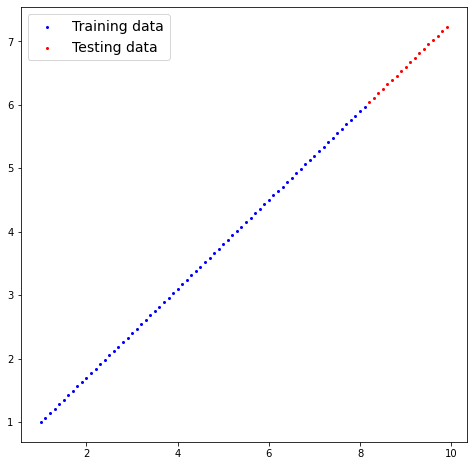

In [7]:
plot_fun()

## 2. Built a model

I will built the model with subclass method which == pure PyTorch

In [8]:
# creat class
class LinearRegressionModelV1(nn.Module): # inheritance all things in Module from NN module
    def __init__(self): # built a constractor 
        super().__init__() # This allows us to call the methods from inside the parent class nn.Model.
        
        # torch.randn() return random numbers from normal distibution with variance = 0 and standard diviation = 1
        # but i will use it torch.rand()
        self.weight = nn.Parameter(torch.rand(1,# start with 1 random weights , you can modify it depending on learning model 
                                             requires_grad = True, # let update values with grafient descent
                                             dtype = torch.float # by bedualt it is float32
                                             ))
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad = True,
                                            dtype = torch.float
                                            ))
        
    # define method for computation the model
    def forward(self , x: torch.tensor) -> torch.tensor: # x is the input data (train | test)
        return self.weight * x + self.bias # this is the formula of equation 
        
        

## Checking the content of the PyTorch model

In [9]:
torch.manual_seed(42)

# tack an object from class
model_0 = LinearRegressionModelV1()

# check the parameter 
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [10]:
# check what the model contain with .state_dict()

model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

## Macking prediction 

In [11]:
# I will use inference mode in pytorch
with torch.inference_mode():
    y_pred = model_0(x_test)

In [12]:
# checking the predictions

print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions mode:{len(y_pred)}")
print(f"predictde values:\n{y_pred}")

Number of testing samples: 18
Number of predictions mode:18
predictde values:
tensor([[8.1496],
        [8.2378],
        [8.3261],
        [8.4143],
        [8.5025],
        [8.5907],
        [8.6790],
        [8.7672],
        [8.8554],
        [8.9437],
        [9.0319],
        [9.1201],
        [9.2083],
        [9.2966],
        [9.3848],
        [9.4730],
        [9.5612],
        [9.6495]])


In [13]:
y_pred == y_test

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

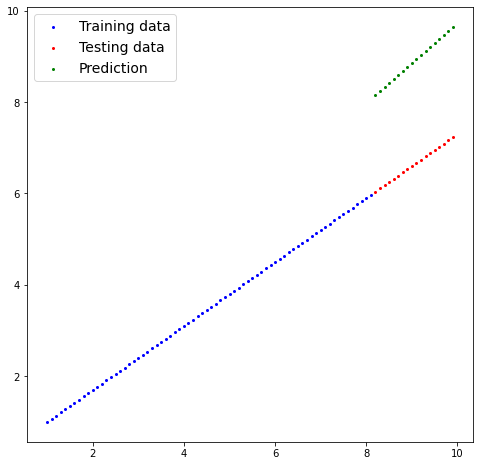

In [14]:
plot_fun(prediction=y_pred)

In [15]:
y_test - y_pred

tensor([[-2.1096],
        [-2.1278],
        [-2.1461],
        [-2.1643],
        [-2.1825],
        [-2.2007],
        [-2.2190],
        [-2.2372],
        [-2.2554],
        [-2.2737],
        [-2.2919],
        [-2.3101],
        [-2.3283],
        [-2.3466],
        [-2.3648],
        [-2.3830],
        [-2.4012],
        [-2.4195]])

## 3. Train model

In [16]:
model_0.parameters()

<generator object Module.parameters at 0x7f52c5ba1250>

In [17]:
# create the loss function
loss_fn = nn.L1Loss() # which = MSE in tensorflow 

# create the optimizer 
optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr = 0.01) 

## Create an optimizing loop in pytorch

Training and Testing loop

In [18]:
torch.manual_seed(42)

epochs = 105

# create an empty container to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    
    # taining 
    model_0.train()
    
    # 1. forward pass
    y_pred = model_0(x_train)
    
    # 2. calculate the loss
    loss = loss_fn(y_pred , y_train)
    
    # 3. zero grad of optimizer 
    optimizer.zero_grad()
    
    # 4. loss backwards
    loss.backward()
    
    # 5. progress the optimizer 
    optimizer.step()
    
    #### testing time
    
    # put the model in evaluation mode
    model_0.eval()
    
    with torch.inference_mode():
        
        # 1. forwared pass in testing mode
        test_pred = model_0(x_test)
        
        # 2. calculate the loss
        test_loss = loss_fn(test_pred , y_test.type(torch.float))
        
        # print what happen
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            
            print(f"Epoch: {epoch} | training loss {loss} | testing loss {test_loss}")

Epoch: 0 | training loss 1.4443289041519165 | testing loss 1.8427658081054688
Epoch: 10 | training loss 0.18802066147327423 | testing loss 0.3060080111026764
Epoch: 20 | training loss 0.17627586424350739 | testing loss 0.29364141821861267
Epoch: 30 | training loss 0.1645345389842987 | testing loss 0.2664166986942291
Epoch: 40 | training loss 0.15281496942043304 | testing loss 0.2394428849220276
Epoch: 50 | training loss 0.14105083048343658 | testing loss 0.22707626223564148
Epoch: 60 | training loss 0.12934374809265137 | testing loss 0.20035426318645477
Epoch: 70 | training loss 0.11757165938615799 | testing loss 0.18823903799057007
Epoch: 80 | training loss 0.10589918494224548 | testing loss 0.17637521028518677
Epoch: 90 | training loss 0.09409260004758835 | testing loss 0.14940132200717926
Epoch: 100 | training loss 0.08475734293460846 | testing loss 0.09017043560743332


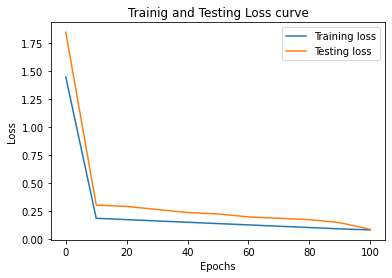

In [19]:
# plot the curve
plt.plot(epoch_count , train_loss_values , label = "Training loss")
plt.plot(epoch_count , test_loss_values , label = "Testing loss")
plt.title("Trainig and Testing Loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [20]:
# found our model learned parameters
print("The model learned the following values for weight and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight} , bias: {bias}")

The model learned the following values for weight and bias:
OrderedDict([('weight', tensor([0.6689])), ('bias', tensor([0.5231]))])

And the original values for weights and bias are:
weights: 0.7 , bias: 0.3


## Making prediction with a trained pytorch model

In [21]:
# 1. set the model in evaluation mode
model_0.eval()

# 2. setup the inference mode
with torch.inference_mode():
    y_preds = model_0(x_test)
    
y_preds

tensor([[6.0077],
        [6.0745],
        [6.1414],
        [6.2083],
        [6.2752],
        [6.3421],
        [6.4090],
        [6.4758],
        [6.5427],
        [6.6096],
        [6.6765],
        [6.7434],
        [6.8103],
        [6.8772],
        [6.9440],
        [7.0109],
        [7.0778],
        [7.1447]])

In [22]:
y_test == y_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [23]:
y_test - y_preds

tensor([[0.0323],
        [0.0355],
        [0.0386],
        [0.0417],
        [0.0448],
        [0.0479],
        [0.0510],
        [0.0542],
        [0.0573],
        [0.0604],
        [0.0635],
        [0.0666],
        [0.0697],
        [0.0728],
        [0.0760],
        [0.0791],
        [0.0822],
        [0.0853]])

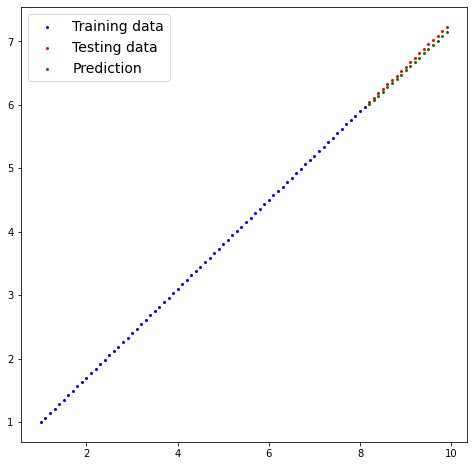

In [24]:
plot_fun(prediction = y_preds)

## 5. Saving and loading the Model

In [25]:
from pathlib import Path

# 1. create model directory
model_path = Path("models")
model_path.mkdir(parents = True , exist_ok = True)

# 2. create model save path
model_name = "model_0_pytorch_workflow_.pth"
model_save_path = model_path / model_name

# 3. save the model
print(f"Saving model to: {model_save_path}")
torch.save(obj = model_0.state_dict(),
          f = model_save_path)

Saving model to: models/model_0_pytorch_workflow_.pth


In [26]:
# check the saved file path
!ls -1 models/model_0_pytorch_workflow_.pth

models/model_0_pytorch_workflow_.pth


## loading the saved model

In [27]:
# new object
loaded_model_0 = LinearRegressionModelV1()

# load the state_dict of our saved model , anf this will update the parameters of the new object
loaded_model_0.load_state_dict(torch.load(f = model_save_path))

<All keys matched successfully>

## Test the new model

In [28]:
# 1. put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. using inferaenc mode
with torch.inference_mode():
    loaded_model_0_pred = loaded_model_0(x_test)

y_preds == loaded_model_0_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## I will stop here 

thanks pytorch doc